In [18]:
import pandas as pd
import numpy as np
import quandl
import datetime
from datetime import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
quandl.ApiConfig.api_key = 'Ufux_HxUXZKAgFjxWhGi'

In [19]:
data13 = pd.read_csv("/Users/guapofish/Desktop/Global AI/SDG_Myfirstproject/equity/sdgtone_13.csv")
data14 = pd.read_csv("/Users/guapofish/Desktop/Global AI/SDG_Myfirstproject/equity/sdgtone_14.csv")
data15 = pd.read_csv("/Users/guapofish/Desktop/Global AI/SDG_Myfirstproject/equity/sdgtone_15.csv")
data = pd.concat([data13,data14,data15], axis=0) 

In [20]:
data15.head()

Unnamed: 0      date code                                         SDG  \
0           0  20150101   --                               1. No Poverty   
1           1  20150101   --                    10. Reduced Inequalities   
2           2  20150101   --      11. Sustainable Cities and Communities   
3           3  20150101   --  12. Responsible Consumption and Production   
4           4  20150101   --                          13. Climate Action   

       tone  
0 -1.304348  
1 -3.102656  
2 -2.319714  
3 -2.276572  
4 -0.474060

In [8]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

In [9]:
df_sum_tone = data.groupby(['date', 'code'])['tone'].agg(['sum']).reset_index() 
df_sum_tone['date'] = pd.to_datetime(df_sum_tone['date'].astype(str), format='%Y%m%d')
df_sum_tone.rename(columns={'code':'ticker'}, inplace=True)


In [10]:
ticker_list = df_sum_tone['ticker'].values
ticker_list = list(set(ticker_list))
adj_close13 = quandl.get_table('WIKI/PRICES', ticker = ticker_list,
                             qopts = { 'columns': ['ticker', 'date', 'adj_close'] },
                             date = { 'gte': '2012-12-31', 'lte': '2013-12-31' },
                             paginate=True)


In [11]:
adj_close14 = quandl.get_table('WIKI/PRICES', ticker = ticker_list,
                             qopts = { 'columns': ['ticker', 'date', 'adj_close'] },
                             date = { 'gte': '2013-12-31', 'lte': '2014-12-31' },
                             paginate=True)
adj_close15 = quandl.get_table('WIKI/PRICES', ticker = ticker_list,
                             qopts = { 'columns': ['ticker', 'date', 'adj_close'] },
                             date = { 'gte': '2014-12-31', 'lte': '2015-12-31' },
                             paginate=True)


In [12]:
adj_close = pd.concat([adj_close15, adj_close14, adj_close13], axis=0)
adj_close = adj_close.sort_values(['ticker', 'date'], ascending=[True, False])

In [13]:
adj_close["return"] = adj_close.groupby("ticker")['adj_close'].apply(lambda x: (x - x.shift(-1))/x.shift(-1))   
df = df_sum_tone.merge(adj_close, how = 'inner', on = ['date', 'ticker'])



In [14]:
N = 10 
df_grouped = df.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x: x.nlargest(N, 
                       columns = ['sum'])).reset_index()
return_list = df_grouped.groupby('date')['return'].mean()
df_return  = return_list.to_frame()
df_return['total_return_10_top_stock'] = (df_return['return'] + 1).cumprod() - 1

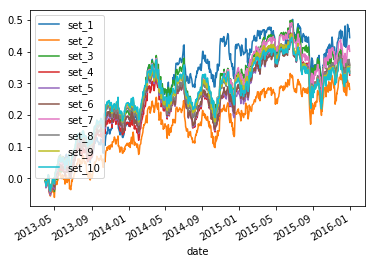

In [15]:
num_of_stock_in_set = 15; 
rank_max = 150;
range_ = rank_max + num_of_stock_in_set; 
graph_num = int((range_-num_of_stock_in_set)/num_of_stock_in_set); 
set_array = [0]*graph_num;
for i in range (num_of_stock_in_set,range_,num_of_stock_in_set):
    N = int(i/num_of_stock_in_set);
    set_array[N-1]='set_'+str(N) 
    df_grouped = df.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x:
            x.nlargest(i, columns = ['sum'])).reset_index() 
    df_grouped.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x: 
            x.nsmallest(num_of_stock_in_set, columns = ['sum'])).reset_index() 
    return_list = df_grouped.groupby('date')['return'].mean() 
    df_return['return_'] = return_list.to_frame()['return'] 
    df_return['set_'+str(N)] = (df_return['return_'] + 1).cumprod() - 1 
df_return.plot(y=set_array) 
plt.show()

In [16]:
N = 5
df_grouped = df.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x: x.nlargest(N, columns = ['sum'])).reset_index()
return_list = df_grouped.groupby('date')['return'].mean()
df_return['return_5']  = return_list.to_frame()['return']
df_return['total_return_5_top_stock'] = (df_return['return_5'] + 1).cumprod() - 1

N = 8
df_grouped = df.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x: x.nlargest(N, 
                       columns = ['sum'])).reset_index()
return_list = df_grouped.groupby('date')['return'].mean()
df_return['return_8']  = return_list.to_frame()['return']
df_return['total_return_8_top_stock'] = (df_return['return_8'] + 1).cumprod() - 1

N = 10
df_grouped = df.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x: x.nlargest(N, 
                       columns = ['sum'])).reset_index()
return_list = df_grouped.groupby('date')['return'].mean()
df_return['return_10']  = return_list.to_frame()['return']
df_return['total_return_10_top_stock'] = (df_return['return_10'] + 1).cumprod() - 1

N = 50 
df_grouped = df.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x: x.nlargest(N, 
                       columns = ['sum'])).reset_index()
return_list = df_grouped.groupby('date')['return'].mean()
df_return['return_50']  = return_list.to_frame()['return']
df_return['total_return_50_top_stock'] = (df_return['return_50'] + 1).cumprod() - 1

N = 100
df_grouped = df.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x: x.nlargest(N, 
                       columns = ['sum'])).reset_index()
return_list = df_grouped.groupby('date')['return'].mean()
df_return['return_100']  = return_list.to_frame()['return']
df_return['total_return_100_top_stock'] = (df_return['return_100'] + 1).cumprod() - 1

N = 500
df_grouped = df.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x: x.nlargest(N, 
                       columns = ['sum'])).reset_index()
return_list = df_grouped.groupby('date')['return'].mean()
df_return['return_500']  = return_list.to_frame()['return']
df_return['total_return_500_top_stock'] = (df_return['return_500'] + 1).cumprod() - 1

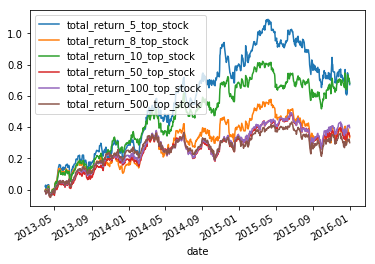

In [17]:
df_return.plot(y=["total_return_5_top_stock","total_return_8_top_stock","total_return_10_top_stock", "total_return_50_top_stock",
                  "total_return_100_top_stock", "total_return_500_top_stock"])
plt.show()